# Synthetic Minority Oversampling Technique (SMOTE) 

# imbalanced dataset

imagine,you have a two categories in your dataset to predict - category-A and Category- B. when category -A is higher than category B or vice versa, you have a problem of imbalanced dataset

In [2]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression

import warnings
warnings.filterwarnings('ignore')

In [3]:
ds=pd.read_csv('pima_indian_diabetes.csv',header=0,names=range(0,8))

In [4]:
ds

,0,1,2,3,4,5,6,7
1,85,66,29,0,26.6,0.351,31,0
8,183,64,0,0,23.3,0.672,32,1
1,89,66,23,94,28.1,0.167,21,0
0,137,40,35,168,43.1,2.288,33,1
5,116,74,0,0,25.6,0.201,30,0
...,...,...,...,...,...,...,...,...
10,101,76,48,180,32.9,0.171,63,0
2,122,70,27,0,36.8,0.340,27,0
5,121,72,23,112,26.2,0.245,30,0
1,126,60,0,0,30.1,0.349,47,1


In [5]:
df=pd.DataFrame(data=ds)

df

,0,1,2,3,4,5,6,7
1,85,66,29,0,26.6,0.351,31,0
8,183,64,0,0,23.3,0.672,32,1
1,89,66,23,94,28.1,0.167,21,0
0,137,40,35,168,43.1,2.288,33,1
5,116,74,0,0,25.6,0.201,30,0
...,...,...,...,...,...,...,...,...
10,101,76,48,180,32.9,0.171,63,0
2,122,70,27,0,36.8,0.340,27,0
5,121,72,23,112,26.2,0.245,30,0
1,126,60,0,0,30.1,0.349,47,1


In [6]:
# all rows 0 to 6 colimns

# [:,0:7]

# [:,-1] = this means all rows last column

In [7]:
dfx=df.iloc[:,0:7]
dfx

,0,1,2,3,4,5,6
1,85,66,29,0,26.6,0.351,31
8,183,64,0,0,23.3,0.672,32
1,89,66,23,94,28.1,0.167,21
0,137,40,35,168,43.1,2.288,33
5,116,74,0,0,25.6,0.201,30
...,...,...,...,...,...,...,...
10,101,76,48,180,32.9,0.171,63
2,122,70,27,0,36.8,0.340,27
5,121,72,23,112,26.2,0.245,30
1,126,60,0,0,30.1,0.349,47


In [8]:
dfy=df.iloc[:,-1]
dfy

1     0
8     1
1     0
0     1
5     0
     ..
10    0
2     0
5     0
1     1
1     0
Name: 7, Length: 767, dtype: int64

In [9]:
dfy.value_counts()

0    500
1    267
Name: 7, dtype: int64

<AxesSubplot:xlabel='7', ylabel='count'>

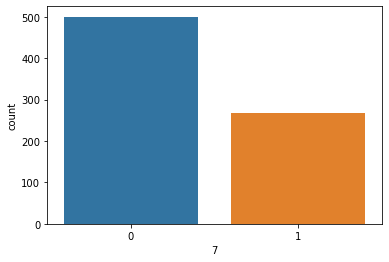

In [10]:
import seaborn as sns

sns.countplot(dfy)

# Applying SMOTE:

In [21]:
import sklearn
sklearn.__version__

'1.1.2'

In [22]:

import numpy
numpy.__version__

'1.20.3'

# ! pip install imblearn --user

!pip install imblearn

In [11]:
from imblearn.over_sampling import SMOTE

In [12]:
smt=SMOTE()
trainx,trainy=smt.fit_resample(dfx,dfy)

In [17]:
dfy.value_counts()

#trainx.value_counts()

0    500
1    267
Name: 7, dtype: int64

In [18]:
trainy.value_counts()

0    500
1    500
Name: 7, dtype: int64

In [27]:
trainy

0      0
1      1
2      0
3      1
4      0
      ..
995    1
996    1
997    1
998    1
999    1
Name: 7, Length: 1000, dtype: int64

<AxesSubplot:xlabel='7', ylabel='count'>

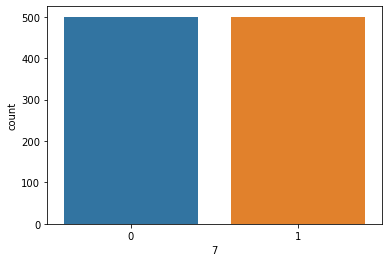

In [28]:
sns.countplot(trainy)

In [29]:
from sklearn.model_selection import train_test_split

In [30]:
train_x,test_x,train_y,test_y = train_test_split(trainx,trainy,test_size=.30,random_state=45)

In [31]:
train_x.shape

(700, 7)

In [32]:
train_y.shape

(700,)

In [33]:
lg=LogisticRegression()
lg.fit(train_x,train_y)
lg.score(train_x,train_y)
pred=lg.predict(test_x)

from sklearn.metrics import accuracy_score
print(round(accuracy_score(test_y,pred),2))


0.72


In [34]:
dfiris=pd.read_csv('iris.csv')

In [35]:
dfiris.head()

,sepal length,sepal width,petal length,petal width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [36]:
dfiris.sample(3)

,sepal length,sepal width,petal length,petal width,class
141,6.9,3.1,5.1,2.3,Iris-virginica
122,7.7,2.8,6.7,2.0,Iris-virginica
129,7.2,3.0,5.8,1.6,Iris-virginica


In [50]:
dfiris['class'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: class, dtype: int64

<AxesSubplot:xlabel='class', ylabel='count'>

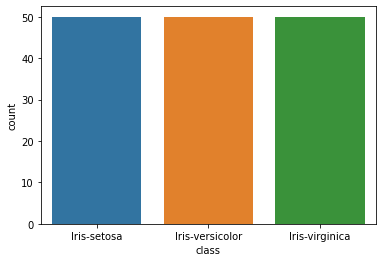

In [51]:
sns.countplot(dfiris['class'])

# IMBALANCED WINE QUALITY DATASET

In [3]:
winedf=pd.read_csv('winequality-red.csv')

In [4]:
winedf.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [5]:
winedf.sample(3)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
816,9.8,0.51,0.19,3.2,0.081,8.0,30.0,0.99840,3.23,0.58,10.5,6
1248,6.9,0.41,0.33,2.2,0.081,22.0,36.0,0.99490,3.41,0.75,11.1,6
795,10.8,0.89,0.30,2.6,0.132,7.0,60.0,0.99786,2.99,1.18,10.2,5


In [6]:
winedf['quality'].value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

<AxesSubplot:xlabel='quality', ylabel='count'>

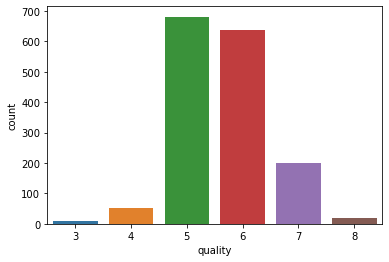

In [8]:
import seaborn as sns

sns.countplot(winedf['quality'])

In [9]:
x=winedf.iloc[:,0:-1]
y=winedf.iloc[:,-1]

In [10]:
y

0       5
1       5
2       5
3       6
4       5
       ..
1594    5
1595    6
1596    6
1597    5
1598    6
Name: quality, Length: 1599, dtype: int64

In [11]:
x.shape

(1599, 11)

In [12]:
y.shape

(1599,)

In [13]:
from imblearn.over_sampling import SMOTE

In [14]:
sm=SMOTE()
xtrainw,ytrainw=sm.fit_resample(x,y)

ytrainw

0       5
1       5
2       5
3       6
4       5
       ..
4081    8
4082    8
4083    8
4084    8
4085    8
Name: quality, Length: 4086, dtype: int64

In [15]:
ytrainw.value_counts()

5    681
6    681
7    681
4    681
8    681
3    681
Name: quality, dtype: int64

<AxesSubplot:xlabel='quality', ylabel='count'>

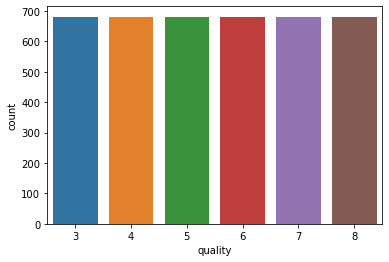

In [16]:
sns.countplot(ytrainw)

In [17]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix

xtrain,xtest,ytrain,ytest=train_test_split(xtrainw,ytrainw,test_size=.30,random_state=45)

dtc=DecisionTreeClassifier()
dtc.fit(xtrain,ytrain)

prd=dtc.predict(xtest)
print('Accuracy ::',accuracy_score(ytest,prd))
confusion_matrix(ytest,prd)

Accuracy :: 0.7765089722675367


array([[213,   3,   4,   0,   0,   0],
       [  3, 171,   7,  14,   1,   0],
       [  1,  24, 113,  56,   4,   1],
       [  1,   5,  38, 109,  48,   6],
       [  0,   3,  11,  16, 156,  14],
       [  0,   0,   0,   6,   8, 190]], dtype=int64)

In [18]:
prd

array([6, 8, 5, ..., 3, 3, 8], dtype=int64)

# Curse of dimensionality reduction

Curse of dimensionality means we are having multiple columns example - 100 columns , 200 columns

In [19]:
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
import warnings
warnings.filterwarnings('ignore')

In [20]:
data=pd.read_csv('sonar.csv',names=range(0,61),header=0)

In [21]:
data=pd.DataFrame(data=data)

In [22]:
data

,0,1,2,3,4,5,6,7,8,9,...,51,52,53,54,55,56,57,58,59,60
0,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,R
1,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,R
2,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,R
3,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,R
4,0.0286,0.0453,0.0277,0.0174,0.0384,0.0990,0.1201,0.1833,0.2105,0.3039,...,0.0045,0.0014,0.0038,0.0013,0.0089,0.0057,0.0027,0.0051,0.0062,R
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
202,0.0187,0.0346,0.0168,0.0177,0.0393,0.1630,0.2028,0.1694,0.2328,0.2684,...,0.0116,0.0098,0.0199,0.0033,0.0101,0.0065,0.0115,0.0193,0.0157,M
203,0.0323,0.0101,0.0298,0.0564,0.0760,0.0958,0.0990,0.1018,0.1030,0.2154,...,0.0061,0.0093,0.0135,0.0063,0.0063,0.0034,0.0032,0.0062,0.0067,M
204,0.0522,0.0437,0.0180,0.0292,0.0351,0.1171,0.1257,0.1178,0.1258,0.2529,...,0.0160,0.0029,0.0051,0.0062,0.0089,0.0140,0.0138,0.0077,0.0031,M
205,0.0303,0.0353,0.0490,0.0608,0.0167,0.1354,0.1465,0.1123,0.1945,0.2354,...,0.0086,0.0046,0.0126,0.0036,0.0035,0.0034,0.0079,0.0036,0.0048,M


In [23]:
x=data.iloc[:,0:-1]

In [24]:
x.shape

(207, 60)

In [25]:
y=data.iloc[:,-1]

In [26]:
y.shape

(207,)

In [27]:
pca=PCA(n_components=10)

In [28]:
x=pca.fit_transform(x)

In [29]:
x.shape

(207, 10)

In [30]:
pd.DataFrame(data=x)

,0,1,2,3,4,5,6,7,8,9
0,-0.970285,1.017654,0.830432,0.120147,0.299120,0.202682,-0.226988,0.384837,0.004329,-0.082679
1,-0.324435,0.876876,0.228203,0.868926,0.098053,-0.269122,-0.421778,0.081072,0.014185,-0.432334
2,0.853571,0.697734,-0.023602,-0.123425,-0.584388,0.351808,0.478187,-0.215424,-0.533955,-0.425182
3,-0.061337,0.226034,0.635198,0.152907,0.150982,0.081111,-0.374523,0.070143,0.119454,-0.427480
4,-0.605423,0.901962,0.804550,0.271896,0.496832,0.464410,-0.224909,0.105504,-0.202842,-0.235048
...,...,...,...,...,...,...,...,...,...,...
202,0.049918,-1.028980,0.265634,0.026018,-0.014738,0.097506,0.012021,0.178998,0.029362,-0.268631
203,0.228374,-1.149870,0.200437,0.043461,0.182020,0.010158,0.084858,0.266152,-0.068963,-0.307679
204,0.306763,-1.147756,0.248975,-0.058557,0.161337,0.013778,0.049391,0.227866,-0.070132,-0.313294
205,-0.038083,-0.994049,0.201938,-0.060790,-0.147673,-0.088874,0.018656,0.069504,-0.024406,-0.165303


In [31]:
y

0      R
1      R
2      R
3      R
4      R
      ..
202    M
203    M
204    M
205    M
206    M
Name: 60, Length: 207, dtype: object

In [32]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
y=le.fit_transform(y)
y

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0])

In [33]:
from sklearn.preprocessing import StandardScaler

In [34]:
scaler = StandardScaler()


In [35]:
x=scaler.fit_transform(x)


In [36]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.22,random_state=45)

In [37]:
x_train.shape

(161, 10)

In [38]:
lr=LogisticRegression()

In [39]:
lr.fit(x_train,y_train)
lr.score(x_train,y_train)
predlr=lr.predict(x_test)
print('accuracy_score :',accuracy_score(y_test,predlr))
print(confusion_matrix(y_test,predlr))
print(classification_report(y_test,predlr))

accuracy_score : 0.8043478260869565
[[23  1]
 [ 8 14]]
              precision    recall  f1-score   support

           0       0.74      0.96      0.84        24
           1       0.93      0.64      0.76        22

    accuracy                           0.80        46
   macro avg       0.84      0.80      0.80        46
weighted avg       0.83      0.80      0.80        46

